<h1>1. Square Root 2</h1>

Task: Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places. Your code should not depend on any module from the standard library or otherwise. You should research the task first and include references and a description of your algorithm.

The square root of 2 to 100 decimal places is

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727 

(according to https://catonmat.net/tools/generate-sqrt2-digits and https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil)

There are several methods in Python that can be used to calculate a square root, but these need to be imported from modules such as *math* or *numpy*. However, the square root of 2 can also be calculated as the one-half power of 2 (https://en.wikipedia.org/wiki/Square_root_of_2) since

$${x^\frac{1}{2} * x^\frac{1}{2}  = x^\frac{1+1}{2}  = x^1}$$ (http://mathforum.org/library/drmath/view/65402.html)

Thus it can be simply calculated as follows:

In [31]:
# Calculating square root 2 with half exponent
exp_half = 2 ** .5
exp_half

1.4142135623730951

This gives the square root of 2 without using any imported libraries but the returned value doesn't satisfy the requirement of 100 decimal places and the final 16th digit is a 1 rather than the expected 0. Perhaps this could simply be reformatted to display 100 decimal places.  

In [32]:
# Formatting to 100 decimal places
"{:.100f}".format(exp_half)

'1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000'

While more decimal places are returned here, they appear to become incorrect after the 15<sup>th</sup> digit. This is due to the difficulty of computing floating point numbers, compounded by the fact that root 2 is an irrational number, seemingly infinite with no repeating pattern. 

Binary expresses real numbers in base 2 and so decimal fractions are expressed as base 2 fractions. If the denominator of the decimal fraction to be expressed is a power of 2, they can be represented accurately (https://stackoverflow.com/a/588014) but other numbers can only be approximated and rounding errors are inherent to their calculation  (https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html). 

The example below demonstrates these errors. While 1.5 - 1.0 == 0.5 returns as True, 1.2 - 1.0 == 0.2 returns as False. This is because 0.5 = 1/2 so the denominator can be expressed as a power of 2 but 0.2 = 1/5, which cannot be represented as a power of 2 and so this number can only be approximated. The estimation appears accurate at first but as the number of values after the decimal point increases, the precision decreases. The same thing happened in the calculation above - the values are correct up to the 15<sup>th</sup> digit but then become inaccurate.

In [2]:
# Demonstrating issues with floating point number calculations
print("Is 1.5 - 1.0 == 0.5?")
print(1.5 - 1.0 == 0.5)
print("")

print("Is 1.2 - 1.0 == 0.2?")
print(1.2 - 1.0 == 0.2)
print("")

print("What is 1.2 - 1.0?")
print(1.2 - 1.0)
print("")

print("Expressing 1.5 and 1.2 to 1 decimal place:")
print(1.5)
print(1.2)
print("")

print("Expressing 1.5 and 1.2 to 10 decimal places:")
print("{:.10f}".format(1.5))
print("{:.10f}".format(1.2))
print("")

print("Expressing 1.5 and 1.2 to 20 decimal placs:")
print("{:.20f}".format(1.5))
print("{:.20f}".format(1.2))

Is 1.5 - 1.0 == 0.5?
True

Is 1.2 - 1.0 == 0.2?
False

What is 1.2 - 1.0?
0.19999999999999996

Expressing 1.5 and 1.2 to 1 decimal place:
1.5
1.2

Expressing 1.5 and 1.2 to 10 decimal places:
1.5000000000
1.2000000000

Expressing 1.5 and 1.2 to 20 decimal placs:
1.50000000000000000000
1.19999999999999995559


While the previous calculation of root 2 became inaccurate after a certain number of values, it looks like the program stopped calculating values altogether and returned only zeros after the 52<sup>nd</sup> digit.

This is because there is a finite number of bits in which to store floating point numbers. Most machines today store floats in 53 bits, which is why the answer above ends with these trailing zeros. https://docs.python.org/3.4/tutorial/floatingpoint.html. It is not possible to store an irrational number such as root 2 in bits as it would require storing something infinite into a finite amount of space.   

Since the issues arising here seem to come from the computational difficulty in calculating a floating point number, perhaps presenting the number 2 as a very large integer (2 with a lot of zeros) will bypass the issue. The returned value needs to have 100 decimal places so 200 zeros are tacked on to 2 and the square root of this number is calculated. Below uses the same method previously utilised to calculate the square root with a 0.5 exponent.

In [34]:
# Add 200 zeros to 2 to get integer square root 
large_int = 2* 10**200 
exp_int = large_int ** .5

exp_int

1.414213562373095e+100

The answer is so large that it's returned as an exponent. The number is formatted below to view it in its entirety, this time without specifying the number of decimal places as is should show an integer.  

In [35]:
# Format to view value above without exponent
'{:f}'.format(exp_int)

'14142135623730950271424125632818586983491648817919875481779003888601306842716543030228210043498528768.000000'

While this method appears to return the required number of digits, albeit in integer form, the values again become incorrect after the 15th digit. Because this method multiplies the large integer representation of 2 by a floating point number (0.5) to get the square root, the problems with computing floating point numbers again come into play. 

Looking at algorithmic options for calculating the square root may help to solve this issue. Some, such as the digit-by-digit long division method, is useful for manual calculation https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Digit-by-digit_calculation but makes for a long-winded computer program https://www.geeksforgeeks.org/long-division-method-to-find-square-root-with-examples/.    

One of the most common algorithms, and one well suited to computation https://en.wikipedia.org/wiki/Methods_of_computing_square_roots, is Newton's Method  This works by calculating successively better approximations of the square root to find the correct answer https://en.wikipedia.org/wiki/Newton%27s_method. Starting with the original number (x), make an estimation of its square root (y) and then improve this by taking the mean of the old estimate (y) and the value of the original number divided by the estimate (x/y). The mean becomes the new estimate and the process is repeated until the equation is solved or the desired number of decimal places is achieved.   https://www.coursera.org/lecture/progfun1/lecture-1-5-example-square-roots-with-newtons-method-FQDE1 

Using x=2 as an example, this would work out as follows


|Estimate (y)   |New Estimate (y + x/y)/2   |
|---|---|
|1   |1.5   |
|1.5   |1.4167   |
|1.4167   |1.4142   |
|....   |....   |

The function below (modified from https://stackoverflow.com/a/5189881 with help from  https://stackoverflow.com/a/8646495) works by first multiplying the original number by 10 to the power of double the number of decimal places required, i.e. if we want 100 decimal places in our answer, we need 200 zeros tacked on to the number. The aim is to get an integer square root, similar to what was attempted above but with the Newtonian method. By using floor division to get the mean for each successive estimate, it avoids the use of floating point numbers altogether, and thus the issues that arise with them. The code continues to refine the estimation until the old and new estimates match, which occurs once the number of digits required is reached. The returned integer value is 101 digits long, including the number that will fall in front of the decimal. To present the final answer, the returned vale of this function is reformatted as a string to include a decimal point.    

In [36]:
# Square root function
def sqrt2(a, digits):
    # Create integer value for 2 with 200 zeroes (square root of which should be 100 zeroes)
    a = a * (10**(2*digits))
   
    # Variables to hold old and new estimates
    x_prev = 0                
    x_next = 1 * (10**digits) # square estimate
    
    # Loop until old and new estimates are equal
    while x_prev != x_next:    
        # Old estimate becomes new estimate
        x_prev = x_next 
        # Use floor division to perform Newtonian calculation to get the new estimate
        x_next = (x_prev + (a // x_prev)) // 2 
    return x_next

# Running the code
x = sqrt2(2, 100)
print(x)
print("")

# Reformatting integer to string to get length and add decimal
x = str(x)
print("Number of digits: " + str(len(x)) +"\n")
print("Answer: " + x[0]+"."+x[1:])

14142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727

Number of digits: 101

Answer: 1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


______________________________________

<h1>2. Chi Squared Test for Independence</h1>

Task: The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables are independent. The Wikipedia article gives the table below as an example, stating the Chi-squared value based on it is approximately 24.6. Use scipy.stats to verify this value and calculate the associated p value. You should include a short note with references justifying your analysis in a markdown cell.

|   |A   |B   |C   |D   |Total   |
|---|---|---|---|---|---|
|White Collar   |90   |60   |104   |95   |349   |
|Blue Collar   |30   |50   |51   |20   |151   |
|No Collar   |30   |40   |45   |35   |150   |
|Total   |150   |150   |200   |150   |650   |

There are certain criteria that data must meet to be suitable for Chi-squared testing. It should be random, categorical and drawn from a large enough sample of mutually exclusive independent variables such that every data point has a value greater than 5 https://www.investopedia.com/terms/c/chi-square-statistic.asp The above data satisfies these conditions: it takes a random sample of 650 people from a city of 1,000,000 and categorises them based on their occupation (white collar, blue collar or no collar) and neighbourhood (A, B, C or D). 

A null hypothesis assumes there is no relationship between these variables, that the neighbourhood a person lives in is not related to their occupation, while an alternative hypothesis would assume there is some kind of association between them. The Chi-squared test calculates the values that would be expected from the sample at each data point if the null hypothesis were true and compares them to the actual observed values. Expected values are calculated for each data point by multiplying the total of a column by the total of a row and dividing it by the total population of the sample. For example, to calculate the expected number of White Collar workers that live in neighbourhood D, we would need to multiply the total of column D (150) by the total of the White Collar row (349) and divide it by the total of the sample (650). https://en.wikipedia.org/wiki/Chi-squared_test

$${\frac{150 x 349}{650} = 80.54}$$

The expected value at this data point is 80.54 but the observed value is 95 so there is a difference of 14.46 between them. One of the results of a Chi-squared test is the Chi-squared statistic, which represents the difference between the observed and expected values; the smaller this value is, the more aligned the observed and expected values are, and therefore it is more likely that the variables are independent from one another. https://www.statisticshowto.com/probability-and-statistics/chi-square/ 

At its most basic, the formula for the Chi-squared statistic is the sum of the squared difference between the observed and expected values for each data point divided by the expected values https://www.statisticshowto.com/probability-and-statistics/chi-square/:

$${\chi}^2=\sum\frac{(O_i - E_i)^2}{E_i}$$

However, this statistic alone is not enough to indicate the independence of the variables - its significance needs to be determined.

The **p-value** indicates the statistical significance of the Chi-squared value. It represents the probability that any extreme  differences seen between the observed and expected values occurred as a result of random chance. https://www.investopedia.com/terms/p/p-value.asp In other words, what are the chances that the actual values would occur if the variables were truly independent of one another? The smaller a p-value, the lower these chances and the more evidence there is in support of the alternative hypothesis that there is a relationship between the variables.

The **critical value** represents a point beyond which the null hypothesis can be rejected. If the Chi-squared statistic is greater than the critical value, the null hypothesis can be rejected  https://www.statisticssolutions.com/non-parametric-analysis-chi-square/. It is determined by the degrees of freedom and the significance level.

- The **degrees of freedom** is a simple calculation that refers to the maximum number of independent values in the dataset that have the freedom to vary https://www.investopedia.com/terms/d/degrees-of-freedom.asp In this case it is the multiplication of the number of rows (minus 1) and the number of columns (minus one): (4-1)(3-1) = 6  

- The **significance level** is related to the p-value. It is an arbitrary point, decided by researchers prior to beginning an analysis, below which they have determined the null hypothesis can be rejected. If the p-value falls below this significance level, researchers can reject the null hypothesis and suspect that there may be a relationship between the variables. However, whether this is a causal relationship cannot be determined by Chi-squared analysis. The significance level can be any value between 0 and 1 but often a value of 0.05 is used as the threshold https://stattrek.com/chi-square-test/independence.aspx



If it is less than 0.05 we cannot accept the null hypothesis 



It is unlikely that the data in this sample would have occurred if the variables were independent from one another. There is some kind of statistically significant relationship between 



https://machinelearningmastery.com/chi-squared-test-for-machine-learning/#

https://www.spss-tutorials.com/chi-square-independence-test/

p value - probability that variables are independent


At its most basic, the Chi-squared 




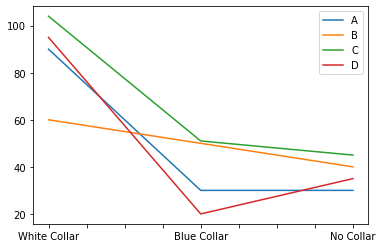

In [21]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Creating dataframe to contain data
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html

df = pd.DataFrame([[90, 60, 104, 95], [30, 50, 51, 20], [30, 40, 45, 35]],
                  index=["White Collar", "Blue Collar", "No Collar"],
                  columns=["A", "B", "C", "D"])

df.plot()

In [13]:
# Followed https://towardsdatascience.com/running-chi-square-tests-in-python-with-die-roll-data-b9903817c51b 
# and https://pythonhealthcare.org/2018/04/13/58-statistics-chi-squared-test/

import numpy as np
from scipy import stats



white = [90, 60, 104, 95]
blue = [30, 50, 51, 20]
none = [30, 40, 45, 35]

collars = np.array([white, blue, none])

chi2_stat, p_val, dof, expected = stats.chi2_contingency(collars)

print(f"Chi2 Stat: {chi2_stat}\n")
print(f"Degrees of Freedom: {dof}\n")
print(f"P-Value: {p_val}\n")
print(f"Contingency Table:\n {expected}\n")


x = stats.chi2.ppf(1-.05, df=dof)
print(f"Critical Value: {x}")

Chi2 Stat: 24.5712028585826

Degrees of Freedom: 6

P-Value: 0.0004098425861096696

Contingency Table:
 [[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]

Critical Value: 12.591587243743977


<h1>3. Standard Deviation </h1>
Task: The standard deviation of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x))\*\*2)/len(x)).
However, Microsoft Excel has two different versions of the standard deviation calculation, STDEV.P and STDEV.S . The STDEV.P function performs the above calculation but in the STDEV.S calculation the division is by len(x)-1 rather than len(x) . Research these Excel functions, writing a note in a Markdown cell about the difference between them. Then use numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. Note that part of this task is to figure out the terminology in the previous sentence.

STDEV.P is used when the data represents the entire population while STDEV.S is used when the data represents just a sample of a population. https://www.exceltip.com/statistical-formulas/how-to-use-excel-stdev-p-function.html

So the calculation for S uses the number of data points less 1 while P uses the whole number of data points.

The formula to calculate the standard deviation is:
- Calculate the mean of all values.
- Calculate the distance between each value and the mean. 
- Square each of these numbers and then add them all together.
- Divide by the number of data points.
- Calculate the square root if this value. 

While this formula returns an accurate standard deviation for a whole population, if it is used for a sample of that population the result will be less accurate because all of the data is not available. The standard deviation for a sample with this formula is often incorrect and so subtracting 1 from the number of data points   
https://en.wikipedia.org/wiki/Bessel's_correction
https://www.thoughtco.com/population-vs-sample-standard-deviations-3126372
https://www.statisticshowto.com/bessels-correction/



# 4. KNN and Iris Data Set

Use scikit-learn to apply k-means clustering to Fisher’s famous Iris data set. You will easily obtain a copy of the data set online. Explain in a Markdown cell how your code works and how accurate it might be, and then explain how your model could be used to make predictions of species of iris.